# <center><font size=7, color="#7B242F"><u> Minimal Cost Complexity Pruning: Regression Trees</u> </font>

## Regression Tree Pruning Using Cost Complexity: 

 - **Minimal Cost-Complexity Pruning**: is one of the techniques of pruning of Decision Trees and Regression Trees, it is an algorithm used to prevent **overfitting** [1](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning).

- This algorithm is parameterized by $(\alpha \ge 0)$ which known as the **complexity parameter**. 

- **The complexity parameter** is used to define the cost-complexity measure, $R_{\alpha}(T)$  of a given tree T as shown in the formula below:

### $$\textbf{R}_{\alpha}\big(T\big) = \textbf{R}\big(T\big) + \alpha \big |T \big |$$
 
 

**where**,

 - **|T|** is the number of terminal nodes in T.
 - **R(T)** is the total misclassification rate of the terminal nodes.
 
### Post pruning decision trees with cost complexity pruning in Sklearn

- **Complexity Cost Parameter alpha** in `sklearn` is called **ccp_alpha**.
  
- Greater values of `ccp_alpha` increase the number of nodes pruned, which leads to an increase in the total impurity of the leaves.

- Choosing the best `ccp_alpha` is based on validation scores. 

- **sklearn** provides a tree classifier method called `cost_complexity_pruning_path()` that returns at each step of the pruning process a list of:
    - **effective alphas** 
    - **The total leaf impurities**.
    
### The steps of Pruning a Tree using Complex parameter:

  1. Instantiate the regressor (classifier in case of classification)
  2. Compute the path using `cost_complexity_pruning_path()` method.
  3. Extract the alphas space from the path
  4. Train the regressor (classifier) and save the results.
  5. Test the regressor (classifier) and compute the accuray
  6. Find the best `ccp_alpha` that gives the maximum accuracy score on the test set.
  
**Note**,

The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, with one node. Therefore, we don't use the last value in our pruning process.

**Python Syntax**,

```python
# Import the necessary tools 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor

# load the data
data = pd.read_csv('data.csv')

X = data['features']
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=1)

# Instantiate the regressor
regtree = DecisionTreeRegressor(random_state=1)

# find the ccp path
path = regtree.cost_complexity_pruning_path(X_train, y_train)

# Extract the ccp_alphas
ccp_alphas = path.ccp_alphas

# remove the last value
ccp_alphas = ccp_alphas[:-1]

# Train the regressor using the ccp_alphas using for loop
# Or any other python techniques that works best.

mse_train = []
mse_test = []

for alpha in ccp_alphas:
    regtree = DecisionTreeRegressor(random_state = 1,
                                    ccp_alpha = alpha)
    
    # Fit the regressor
    regtree.fit(X_train, y_train)
    
    # predict on train set
    pred_train = regtree.predict(y_train)
    
    # predict on test set
    pred_test = regtree.predict(y_test)
    
    # append the results to mse_train
    mse_train.append(MSE(y_train, pred_train))
    
    # append the results to mse_test
    mse_test.append(MSE(y_test, pred_test))

# Plot the results

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, accuracy_train, marker="o", label="train")
ax.plot(ccp_alphas, accuracy_test, marker="o", label="test")
ax.legend()
plt.show()


# Find the best ccp_alpha
best_ccp_alpha = ccp_alpha[np.argmin(mse_test)]

# Refit the regressor using best ccp_alpha
best_tree = DecisionTreeRegressor(random_state=1, 
                                  ccp_alpha = best_ccp_alpha)
best_tree.fit(X_train, x_train)

# predict

best_pred_train = best_tree.predict(y_train)
best_pred_test = best_tree.predict(y_test)

# print the results
print("The best MSE on train set is: ".format(best_pred_train))
print("The best MSE on test set is: ".format(best_pred_test))
```

**That is it**.

___

In [1]:
##=======================================================
#               Import the necessary tools 
##=======================================================
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor

# load the data
# ----------------
auto= pd.read_csv('auto_mpg.csv')

# preprocess the data
# ---------------------
auto.loc[auto['horsepower']=='?', 'horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype('float')

# Dropping missing data points
# -------------------------
auto.dropna(inplace=True)


# Encoding the origin variable
# ------------------------------
auto['origin'] = auto['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


auto = pd.get_dummies(auto, columns = ['origin'], prefix = '', 
                      prefix_sep = '', drop_first=True)


# Split the data
# ---------------
X = auto.drop(['mpg', 'car name'], axis=1).values
y = auto['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)

In [2]:
## ================================================================
#        Train Unconstrained Regression Tree
## ================================================================

rt = DecisionTreeRegressor(random_state=1)

rt.fit(X_train, y_train)

pred_train = rt.predict(X_train)
pred_test = rt.predict(X_test)

print("The MSE on train set is: {:.3f}".format(MSE(y_train, pred_train)))
print("The MSE on test set is: {:.3f}".format(MSE(y_test, pred_test)))

The MSE on train set is: 0.000
The MSE on test set is: 10.453


## <center><u><font size=6, color="#7B24AF">Pruning the Regression Tree Using ccp_alpha</u>

In [3]:
# Instantiate the regressor without any constraints
# -------------------------------------------------
regtree = DecisionTreeRegressor(random_state=1)

# Find the ccp path
#-------------------
path = regtree.cost_complexity_pruning_path(X_train, y_train)

# Extract the ccp_alphas
ccp_alphas = path.ccp_alphas

# remove the last value
ccp_alphas = ccp_alphas[:-1]
ccp_alphas[:10]

array([0.00000000e+00, 1.59744409e-05, 1.59744409e-05, 2.12992545e-05,
       2.12992545e-05, 6.38977636e-05, 6.38977636e-05, 6.38977636e-05,
       6.38977636e-05, 8.51970181e-05])

In [4]:
# Train the regressor using the ccp_alphas using for loop
#=========================================================

mse_train = []
mse_test = []

for alpha in ccp_alphas:
    regtree = DecisionTreeRegressor(random_state = 1,
                                    ccp_alpha = alpha)
    
    # Fit the regressor
    regtree.fit(X_train, y_train)
    
    # predict on train set
    pred_train = regtree.predict(X_train)
    
    # predict on test set
    pred_test = regtree.predict(X_test)
    
    # append the results to mse_train
    mse_train.append(MSE(y_train, pred_train))
    
    # append the results to mse_test
    mse_test.append(MSE(y_test, pred_test))

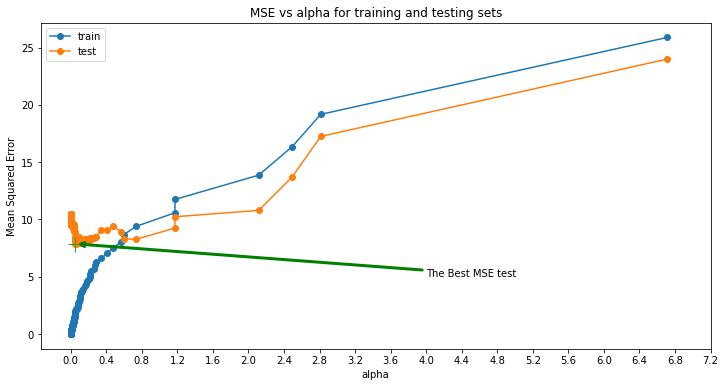

In [5]:
# Plot the results
# -----------------
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, mse_train, marker="o", label="train")
ax.plot(ccp_alphas, mse_test, marker="o", label="test")
ax.plot(ccp_alphas[np.argmin(mse_test)], min(mse_test), marker='+', markersize = 15)
ax.set_xticks(np.arange(0, 7.4, 0.4))
ax.annotate("The Best MSE test", xy = (0.0523, 7.8654),
             xytext=(4, 5),            
             arrowprops={'arrowstyle': '->', 
                         'color': 'green',
                         'linewidth': 3})
ax.legend()
plt.show()

### Zooming Out the plot

In [6]:
# Prepare the data for zooming the plot
# -------------------------------------
zoom_ccp = [i for i in ccp_alphas if i<1]
len(zoom_ccp)
mse_train_ar = np.array(mse_train)
mse_test_ar = np.array(mse_test)

mse_train_ar = mse_train_ar[ccp_alphas<1]
mse_test_ar = mse_test_ar[ccp_alphas<1]

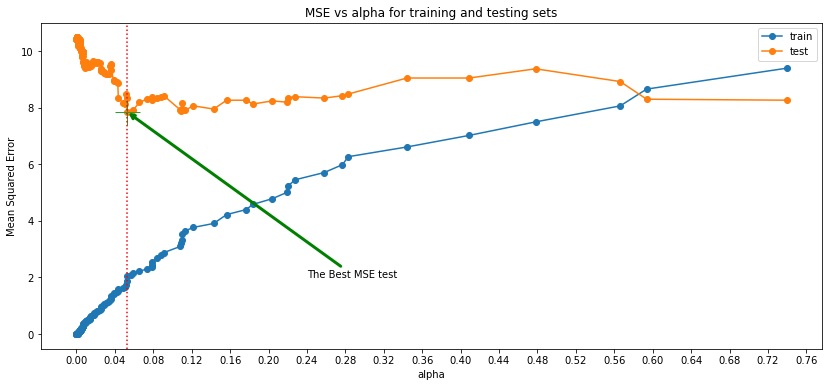

In [7]:
# Plot an area where ccp_alphas values are less than one
# This is based on the previous plot
# =======================================================

fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(zoom_ccp, mse_train_ar, marker="o", label="train")
ax.plot(zoom_ccp, mse_test_ar, marker="o", label="test")
ax.plot(ccp_alphas[np.argmin(mse_test)], min(mse_test), marker='+', markersize = 25)
ax.set_xticks(np.arange(0, 0.8, 0.04))
ax.axvline(x = 0.0523, linestyle = "dotted", color = "red")
ax.annotate("The Best MSE test", xy = (0.0523, 7.8654),
             xytext=(0.24, 2),            
             arrowprops={'arrowstyle': '->', 
                         'color': 'green',
                         'linewidth': 3})
ax.legend()
plt.show()

### Finding the Best CCP_ALPHA

In [8]:
# Here, I explain how find the results in more detail
# Finding the index where the mse_test is minimum
# use np.argmin
# -----------------------------------------------
min_ind = np.argmin(mse_test)
print("The index of minimum mse_test:",min_ind)

# Find the minimum mse_test value
min_mse_test_val = mse_test[min_ind]
print("The minimum mse_test value", min_mse_test_val)

# Find the value of ccp_alpha that results the min of mse_test

ccp_alpha_val = ccp_alphas[np.argmin(mse_test)]
print("ccp_alpha value where mse_test is minimum: ", ccp_alpha_val)

The index of minimum mse_test: 177
The minimum mse_test value 7.865401312993814
ccp_alpha value where mse_test is minimum:  0.052342917997869685


In [9]:
# Find the best ccp_alpha and min mse_test in less detail
#--------------------------------------------------------
best_ccp_alpha = ccp_alphas[np.argmin(mse_test)]
print("The best mse test is: {:.3f}".format(min(mse_test)))
print("The best ccp alpha value: {:.4f}".format(best_ccp_alpha))

The best mse test is: 7.865
The best ccp alpha value: 0.0523


### Refitting the Regressor Using the Best Results

In [10]:
# Refitting a Regreesion Tree using the found results
# ---------------------------------------------------

best_regtree = DecisionTreeRegressor(random_state=1, 
                                     ccp_alpha = best_ccp_alpha)
best_regtree.fit(X_train, y_train)

# prediction
# ---------

best_pred_train = best_regtree.predict(X_train)
best_pred_test = best_regtree.predict(X_test)

# print the results
# ------------------

print("The Best Results of Using ccp_alpha".center(50))
print("*"*50, "\n")
print("The best MSE on train set is: {:.5f}".format(
    MSE(best_pred_train, y_train))
     )
print("The best MSE on test set is: {:.5f}".format(
    MSE(best_pred_test, y_test))
     )
print("="*50)

# The parameters of this model 
for key, value in best_regtree.get_params().items():
    print("{:30}{}".format(key, value))
print("="*50)

# Some information about the tree
# ---------------------------------
print("The number of node counts:{:6}".format(best_regtree.tree_.node_count))
print("The number of leaves:{:11}".format(best_regtree.tree_.n_leaves))
print("The maximum depths:{:12}".format(best_regtree.tree_.max_depth))
print("="*50)

       The Best Results of Using ccp_alpha        
************************************************** 

The best MSE on train set is: 2.04176
The best MSE on test set is: 7.86540
ccp_alpha                     0.052342917997869685
criterion                     squared_error
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease         0.0
min_samples_leaf              1
min_samples_split             2
min_weight_fraction_leaf      0.0
random_state                  1
splitter                      best
The number of node counts:    89
The number of leaves:         45
The maximum depths:           8


### References: 

  - Cost Complexity pruning maths: https://online.stat.psu.edu/stat508/lesson/11/11.8/11.8.2
  
  - sklearn `ccp_alpha`: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py
  
  - mlwiki `ccp_alpha`: http://mlwiki.org/index.php/Cost-Complexity_Pruning
  
  - [The Elements of Statistical Learning](https://hastie.su.domains/Papers/ESLII.pdf) by Friedman et. al ()